In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [2]:
df = pd.read_csv('fifa_allrows.csv')

In [3]:
df.head()

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,forvet
0,90,93,32,76,93,63,85,95,80,95,85,88,2
1,89,90,30,90,95,95,90,68,59,93,77,71,2
2,92,84,25,84,95,82,80,61,53,90,75,62,2
3,82,90,30,84,91,60,84,69,80,92,77,77,2
4,91,90,31,11,48,35,70,78,83,12,15,25,0


In [4]:
# total number of rows=17994 + 1
len(df.index)

17994

In [5]:
def change_forvet(f):
    if f == 2:
        return 'good'
    elif f == 1:
        return 'average'
    else:
        return 'bad'
   

In [6]:
df['forvet'] = df['forvet'].apply(change_forvet)

In [7]:
def plot_decision_tree(clf,feature_name,path,target_name):
    f = io.StringIO()  
    tree.export_graphviz(clf, out_file=f,  
                         feature_names=feature_name,  
                         class_names=target_name,filled=True, rounded=True, special_characters=True)  
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

In [8]:
train, test = train_test_split(df, test_size = 0.30)

In [9]:
train

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,forvet
5798,67,69,28,65,63,64,69,72,82,72,45,66,average
11772,62,60,24,12,13,60,16,41,39,11,12,11,bad
4702,74,73,31,47,71,66,60,81,73,73,68,69,average
3451,82,57,29,70,70,74,62,62,65,76,70,63,bad
16631,72,31,19,30,43,53,36,62,70,44,55,58,bad
9499,75,51,23,37,64,64,48,71,73,52,66,65,bad
796,53,45,29,65,71,65,46,75,76,39,49,79,bad
4933,76,57,27,52,70,74,65,85,69,68,64,73,bad
4533,73,73,30,75,77,68,61,67,71,75,65,59,average
4905,57,60,34,54,70,52,66,76,75,65,63,58,bad


In [10]:
test

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,forvet
1627,82,75,26,80,70,76,69,91,68,75,65,71,average
3663,66,61,25,73,75,70,77,69,53,75,73,42,bad
8642,70,65,29,12,19,61,20,59,58,11,22,15,bad
13697,62,62,32,14,21,53,33,70,73,10,13,15,bad
16284,63,47,28,34,60,77,45,47,46,70,54,36,bad
15758,63,52,19,14,15,42,21,57,63,14,14,18,bad
10380,58,65,32,13,21,56,29,64,74,19,19,12,bad
689,68,74,35,77,83,75,81,37,60,77,84,56,average
1842,62,41,28,33,63,57,50,85,78,42,36,74,bad
7475,74,43,26,41,61,82,43,81,60,49,62,54,bad


In [11]:
X_train = train.loc[:, train.columns != 'forvet']
Y_train = train.forvet
X_test = test.loc[:, test.columns != 'forvet']
Y_test = test.forvet

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [13]:
train.columns[12]

'forvet'

In [14]:
labels = ['average', 'bad', 'good']

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.741033 to fit



C:\Users\egede\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


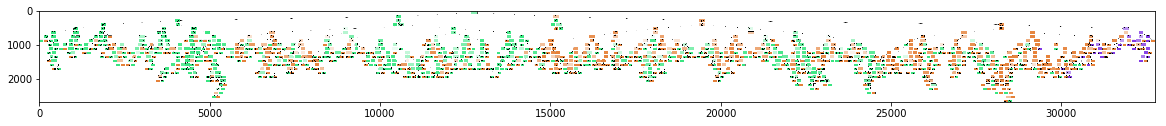

In [15]:
plot_decision_tree(clf, X_train.columns,'dt_common.png',labels)

In [16]:
Y_test

1627     average
3663         bad
8642         bad
13697        bad
16284        bad
15758        bad
10380        bad
689      average
1842         bad
7475         bad
14600        bad
12014        bad
14721        bad
10627        bad
16142        bad
12407        bad
4739     average
9464     average
4755         bad
16221        bad
11899        bad
8076         bad
11955        bad
631          bad
10154        bad
11014        bad
1685         bad
10327        bad
5602         bad
7008         bad
          ...   
12857        bad
11396        bad
3258     average
1794        good
8140         bad
10173        bad
11646        bad
14157        bad
9718         bad
6526     average
9147         bad
6349         bad
2380     average
5913         bad
7051         bad
11749    average
13412        bad
6402         bad
3605     average
16953        bad
4586         bad
11374    average
16673        bad
6711     average
1321         bad
15999        bad
4901         bad
2829         b

In [17]:
y_pred = clf.predict(X_test)

In [18]:
y_pred

array(['bad', 'average', 'bad', ..., 'bad', 'bad', 'bad'], dtype=object)

In [19]:
score = accuracy_score (Y_test, y_pred)*100

In [20]:
print("Accuracy using Decision Tree", round(score), "%")

Accuracy using Decision Tree 91.0 %


In [21]:
df.ix[289]

C:\Users\egede\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


pas accuracy            72
shooting                82
age                     31
free_kick_accuracy      36
ball_control            75
balance                 53
vision                  62
jumping                 76
strength                86
positioning             84
crossing                62
heading_accuracy        83
forvet                good
Name: 289, dtype: object

In [22]:
df.ix[56]

pas accuracy           66
shooting               58
age                    28
free_kick_accuracy     69
ball_control           70
balance                50
vision                 67
jumping                81
strength               82
positioning            56
crossing               64
heading_accuracy       82
forvet                bad
Name: 56, dtype: object